<a href="https://colab.research.google.com/github/ajmoore12/WPA_Competition/blob/main/wpac_skillup_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install --upgrade google-cloud-bigquery-storage pandas

In [2]:
import torch
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

GPU Available: False
Using device: cpu


In [3]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery
from google.colab import files
import pandas as pd

project_id = 'wpac-449904'
dataset_id = 'wpac_data'
# Create a storage client
client = bigquery.Client(project=project_id)

In [4]:
pd.set_option('display.max_columns', None)

survey = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.survey`").to_dataframe()
success = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.success_target`").to_dataframe()

In [5]:
survey.head()

,version,year_quarter,children,concern_finances,concern_health,concern_job,concern_job_search,concern_social,contract_work,current_job_benefits_childcare,current_job_benefits_education,current_job_benefits_health,current_job_benefits_none,current_job_benefits_other,current_job_benefits_pto,current_job_benefits_schedule,current_job_benefits_training,current_job_benefits_transportation,desired_industry,desired_industry_other,education,employment,employment_other,expenses_inflation,fed_quarter,gender,household_adult_children,household_decline,household_none,household_other,household_other_relatives,household_parents,household_siblings,household_spouse,household_young_children,income,income_covered_expenses,job_confidence,job_payment,job_payment_other,job_search_challenge,job_search_challenge_other,job_title,main_reason_looking,main_reason_other,new_job,new_job_better_advancement,new_job_better_benefits,new_job_better_commute,new_job_better_environment,new_job_better_hours,new_job_better_none,new_job_better_other,new_job_better_pay,new_job_better_title,new_job_company,new_job_field,new_job_income,new_job_industry,new_job_looking,previous_job_income,primary_work_schedule,public_benefits_childcare,public_benefits_decline,public_benefits_disability,public_benefits_eitc,public_benefits_medicare,public_benefits_none,public_benefits_pell,public_benefits_snap,public_benefits_tanf,public_benefits_ui,public_benefits_wioa,race,skillup_additional_resources,skillup_entry_reason_better_job,skillup_entry_reason_current_industry_skills,skillup_entry_reason_lost_job,skillup_entry_reason_new_industry_skills,skillup_feature,skillup_find_new_job,skillup_helpful_awareness_career,skillup_helpful_awareness_training,skillup_helpful_confidence_job,skillup_helpful_new_job,skillup_recommend,skillup_training,training_completed,training_enrolled,training_field,training_plan_to_enroll,training_program_provider,training_program_title,training_support_services,worked_past_six_months,years_experience,WPA_id
0,C1Q2,2023Q1,None,None,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,Healthcare,None,None,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Somewhat confident,I was paid an hourly wage.,None,Not hearing back from the places I apply to.,None,Dental assistant,Looking for a better work enviornment.,None,None,None,None,None,None,None,NaN,None,None,None,None,New field of work,None,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Recruiters on app,None,None,None,None,None,None,Somewhat helpful,Somewhat helpful,Somewhat helpful,None,5.0,No,In progress (completing in next 4-6 months),Yes,None,No,Egan,Na,No,Yes,5-10,WPA_343
1,C1Q3,2023Q2,None,None,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,Technology,None,None,"Yes, Full-Time (35 hours or more per week)",None,None,No,None,None,None,None,None,None,None,None,None,None,None,None,Somewhat confident,I am paid an hourly wage.,None,Need additional skills.,None,Dental assistant,Seeking a job with higher pay.,None,Yes,None,None,None,Yes,None,NaN,None,Yes,None,None,New field of work,"$30,000 - $39,999",None,Yes,"$20,000 - $29,999",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Somewhat helpful,Somewhat helpful,Somewhat helpful,Not so helpful,5.0,None,None,No,None,No,None,None,None,None,11-14,WPA_343
2,C1Q5,2024Q1,None,Extremely concerned,Slightly concerned,Slightly concerned,Slightly concerned,Extremely concerned,Yes,None,None,None,None,None,None,Yes,None,None,None,None,None,"Yes, Full-Time (35 hours or more per week)",None,Increased,None,None,None,None,None,None,None,None,None,None,None,None,No,None,I am paid an hourly wage.,None,None,None,Dental assistant,None,None,No,None,None,None,None,None,NaN,N/a,None,None,None,None,"$40,000 - $49,999",None,No,"$40,000 - $49,999",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,N/a,No,Somew

In [6]:
df = survey[['WPA_id', 'skillup_feature', 'skillup_recommend']].merge(success, on='WPA_id', how='left')
df.head()

,WPA_id,skillup_feature,skillup_recommend,target_success
0,WPA_343,None,5.0,1
1,WPA_343,None,5.0,1
2,WPA_343,N/a,5.0,1
3,WPA_343,None,5.0,1
4,WPA_343,None,10.0,1


In [7]:
median_recommendation = df['skillup_recommend'].median()
df['skillup_recommend'] = df['skillup_recommend'].fillna(median_recommendation)
for col in df.columns:
  print(df[col].value_counts(dropna=False))
print(df.info())

WPA_id
WPA_8461     7
WPA_2805     7
WPA_9896     7
WPA_9803     7
WPA_9705     7
            ..
WPA_83030    1
WPA_83015    1
WPA_83009    1
WPA_83000    1
WPA_69004    1
Name: count, Length: 10383, dtype: int64
skillup_feature
None                         9258
Not sure                      244
N/a                           208
Na                            197
Nothing                        97
                             ... 
More healthcare courses.        1
Mobile App                      1
Office hours for a mentor       1
Newsletters                     1
thvd                            1
Name: count, Length: 7439, dtype: int64
skillup_recommend
10.0    5788
8.0     3821
7.0     2434
5.0     1896
9.0     1874
6.0     1637
4.0      536
0.0      485
3.0      373
2.0      287
1.0      176
Name: count, dtype: int64
target_success
<NA>    14752
0        2722
1        1833
Name: count, dtype: Int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19307 entries, 0 to 19306
Data column

In [8]:
# df_filtered = df[(df['skillup_recommend'] <= 7.0) & (df['target_success'] == 0)].dropna(subset=['skillup_feature'])

In [9]:
df_filtered = df[df['skillup_recommend'] <= 7.0].dropna(subset=['skillup_feature'])

In [10]:
df_filtered.value_counts(dropna=False)

WPA_id     skillup_feature                                                                                                         skillup_recommend  target_success
WPA_5871   Not sure                                                                                                                5.0                0                 3
WPA_43475  Na                                                                                                                      7.0                0                 2
WPA_69870  I'm not sure                                                                                                            0.0                0                 2
WPA_57992  More reminders                                                                                                          3.0                <NA>              2
WPA_35591  Free resume writing                                                                                                     6.0                0                 2
                                                                                                                                                                       ..
WPA_31077  Interview prep                                                                                                          6.0                <NA>              1
           Personalized recommendations                                                                                            7.0                <NA>              1
WPA_31089  I don't see much opportunity for job and for training, most of my interested training needed money which is a problem.  7.0                <NA>              1
WPA_31132  Career Training opportunities in my area                                                                                5.0                <NA>              1
WPA_99927  Not sure                                                                                                                3.0                <NA>              1
Name: count, Length: 4085, dtype: int64

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df_filtered['sentiment_score'] = df_filtered['skillup_feature'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Categorize Sentiment
df_filtered['sentiment_label'] = df_filtered['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral')

# Display Sentiment Results
df_filtered[['WPA_id', 'skillup_feature', 'sentiment_score', 'sentiment_label']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,WPA_id,skillup_feature,sentiment_score,sentiment_label
2,WPA_343,N/a,0.0,neutral
21,WPA_368,More interactions,0.0,neutral
41,WPA_236,Nothing I can think of at the moment!,0.0,neutral
57,WPA_268,Files,0.0,neutral
60,WPA_268,Chat,0.0,neutral


In [12]:
df_grouped = df_filtered.groupby('sentiment_label').agg(
    WPA_id=('WPA_id', 'nunique'),
    sentiment_score=('sentiment_score', 'mean')
).rename(columns={'WPA_id': 'No. of Respondents', 'sentiment_score': 'Avg. Sentiment Score'}) \
  .sort_values(by='Avg. Sentiment Score', ascending=False)

df_grouped

,No. of Respondents,Avg. Sentiment Score
sentiment_label,,
positive,1095,0.468823
neutral,1931,0.000117
negative,505,-0.263123


In [13]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract noun phrases
def extract_phrases(text):
    doc = nlp(text)
    return [' '.join(chunk.text.lower().split()) for chunk in doc.noun_chunks]

# Apply phrase extraction
df_filtered['extracted_phrases'] = df_filtered['skillup_feature'].apply(lambda x: extract_phrases(x))

# Display extracted phrases
df_filtered[['WPA_id', 'skillup_feature', 'extracted_phrases']].head()



,WPA_id,skillup_feature,extracted_phrases
2,WPA_343,N/a,"[n, a]"
21,WPA_368,More interactions,[more interactions]
41,WPA_236,Nothing I can think of at the moment!,"[nothing, i, the moment]"
57,WPA_268,Files,[files]
60,WPA_268,Chat,[]


In [14]:
#Trying to extract phrases
from sklearn.feature_extraction.text import CountVectorizer

# Convert text to lowercase and remove punctuation
df_filtered['cleaned_text'] = df_filtered['skillup_feature'].str.lower().str.replace(r'[^\w\s]', '')

# Define function to extract top n-grams
def get_top_ngrams(corpus, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)

    # Get n-gram frequency
    ngram_freq = ngram_counts.sum(axis=0).tolist()[0]
    ngram_list = vectorizer.get_feature_names_out()

    # Sort and return top phrases
    return sorted(zip(ngram_list, ngram_freq), key=lambda x: x[1], reverse=True)[:top_k]

# Extract bigrams (2-word phrases)
bigrams = get_top_ngrams(df_filtered['cleaned_text'].dropna(), n=2, top_k=15)

# Extract trigrams (3-word phrases)
trigrams = get_top_ngrams(df_filtered['cleaned_text'].dropna(), n=3, top_k=15)

# Print results
print("Top 15 Bigrams:", bigrams)
print("Top 15 Trigrams:", trigrams)


Top 15 Bigrams: [('training programs', 88), ('don know', 81), ('job opportunities', 57), ('job search', 52), ('free training', 51), ('job training', 46), ('remote jobs', 38), ('training opportunities', 37), ('job placement', 36), ('free courses', 27), ('entry level', 24), ('job openings', 22), ('training program', 20), ('remote work', 19), ('user friendly', 19)]
Top 15 Trigrams: [('free training programs', 10), ('entry level jobs', 7), ('job training opportunities', 6), ('don really know', 5), ('job training programs', 5), ('free training opportunities', 4), ('help finding jobs', 4), ('job placement services', 4), ('jobs entry level', 4), ('paid job training', 4), ('remote job opportunities', 4), ('work home jobs', 4), ('available state reside', 3), ('better job search', 3), ('entry level job', 3)]


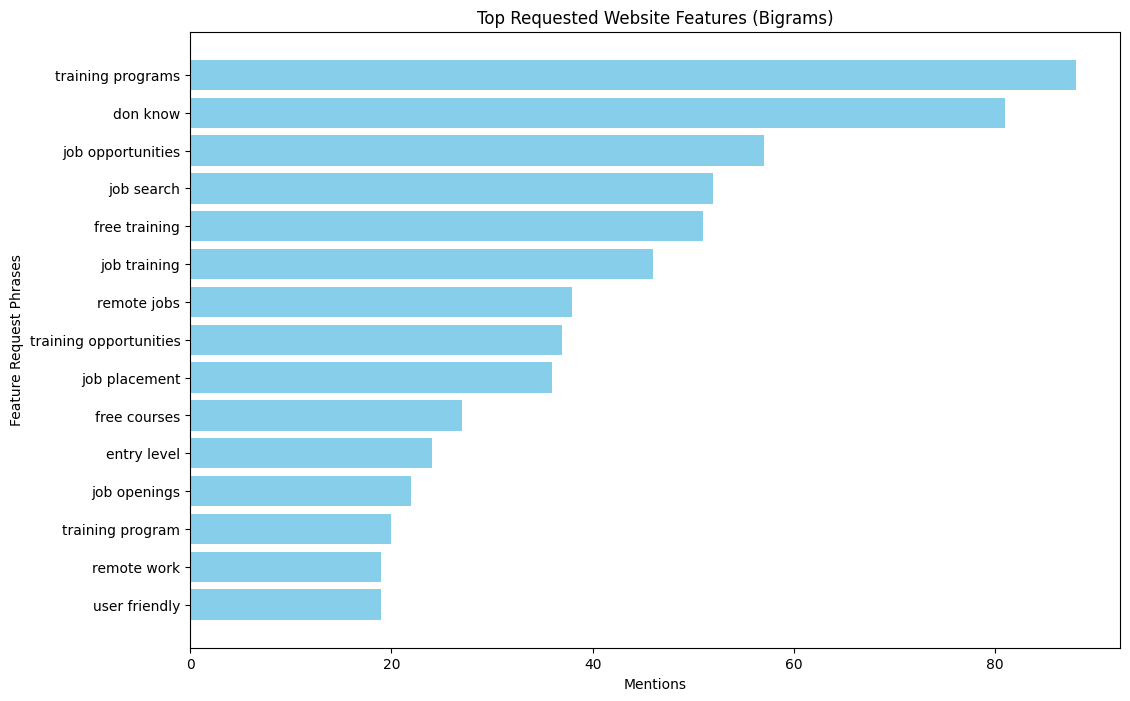

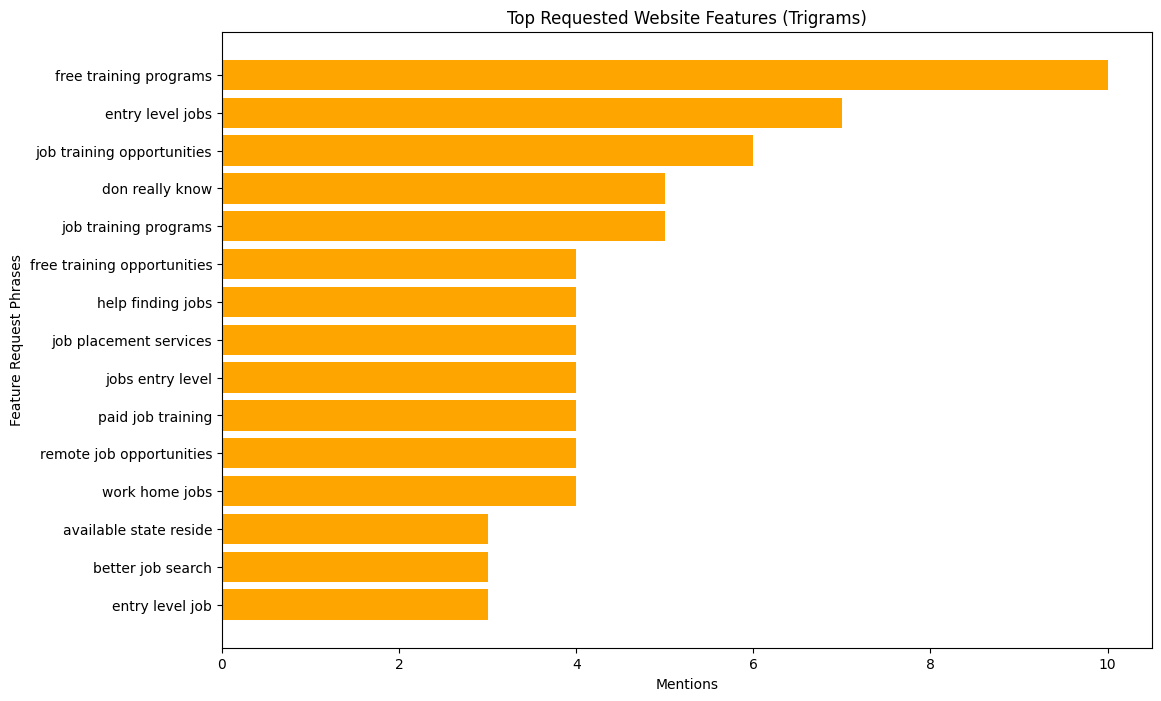

In [15]:
#Visualizing Phrases

import matplotlib.pyplot as plt

# Convert bigrams to a DataFrame for visualization
bigram_df = pd.DataFrame(bigrams, columns=['Phrase', 'Count'])
trigram_df = pd.DataFrame(trigrams, columns=['Phrase', 'Count'])

# Plot bigram frequency
plt.figure(figsize=(12, 8))
plt.barh(bigram_df['Phrase'], bigram_df['Count'], color='skyblue')
plt.xlabel("Mentions")
plt.ylabel("Feature Request Phrases")
plt.title("Top Requested Website Features (Bigrams)")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 8))
plt.barh(trigram_df['Phrase'], trigram_df['Count'], color='orange')
plt.xlabel("Mentions")
plt.ylabel("Feature Request Phrases")
plt.title("Top Requested Website Features (Trigrams)")
plt.gca().invert_yaxis()
plt.show()
